In [1]:
import datetime

import altair as alt
import numpy as np
import pandas as pd


In [2]:
actual = pd.read_csv('../data/actual.csv', index_col='id', dtype={'id': int, 'ico': str, 'druh': 'category'}, parse_dates=['datum_zverejneni', 'datum_uzavreni', 'datum_uvolneni_zakazu'])
archive = pd.read_csv('../data/archive.csv', index_col='id', dtype={'id': int, 'ico': str, 'druh': 'category'}, parse_dates=['datum_zverejneni', 'datum_uzavreni', 'datum_uvolneni_zakazu'])

In [3]:
combined = actual.append(archive)
combined.head()

,referencni_cislo,ico,nazev,adresa,datum_zverejneni,datum_uzavreni,datum_uvolneni_zakazu,stav_uzavreni,druh,zjistene_skutecnosti
id,,,,,,,,,,
51052,P22-000004-SZPI-CZ,19014325,"H R U Š K A , spol. s r.o.","Vysoká nad Labem 186, 503 31 Vysoká nad Labem",2022-01-07,2022-01-06,2022-01-07,Znovu otevřeno,Maloobchod,Výskyt trusu hlodavců|Stopy po působení a výsk...
51051,P22-000003-SZPI-CZ,74456571,NAM BUI HUY,"Velké Hamry 492, 468 45 Velké Hamry",2022-01-06,2022-01-05,NaT,Uzavřeno,Maloobchod,Výskyt trusu hlodavců
51050,P22-000002-SZPI-CZ,00031747,"COOP Hořovice, družstvo","Radouš 83, 267 24 Hostomice",2022-01-05,2022-01-04,2022-01-05,Znovu otevřeno,Maloobchod,Výskyt trusu hlodavců|Potraviny poškozené nebo...
51049,P22-000001-SZPI-CZ,28329147,KORČIÁN s.r.o.,671 51 Vranovská Ves 124,2022-01-04,2022-01-04,NaT,Uzavřeno,Rychlé občerstvení,Výskyt trusu hlodavců|Výskyt živých hlodavců|V...
51048,P21-000095-SZPI-CZ,00031747,"COOP Hořovice, družstvo","Kuštova 1769, 269 01 Rakovník",2021-12-22,2021-12-21,2021-12-22,Znovu otevřeno,Maloobchod,Výskyt trusu hlodavců


In [4]:
# Druhy provozoven v seznamu
combined['druh'].value_counts()

Maloobchod                       475
Restaurace                       239
Pivnice, bar nebo herna          117
Výroba                           101
Rychlé občerstvení                62
Velkoobchod                       31
Výroba a rozvoz jídel             13
Čerpací stanice                    6
Vinárna nebo vinotéka              4
Mobilní stánek s občerstvením      2
Internetový obchod                 2
Cukrárna                           2
Přeprava                           1
Name: druh, dtype: int64

In [5]:
combined['datum_uzavreni'].min().date()

datetime.date(2015, 1, 15)

In [6]:
combined['stav_uzavreni'].value_counts()

Znovu otevřeno    951
Uzavřeno          104
Name: stav_uzavreni, dtype: int64

In [7]:
# List of unique offenses
offenses_list = combined['zjistene_skutecnosti'].dropna().str.split('|').to_list()
unique_offenses = set()
for multiple in offenses_list:
    for single in multiple:
        unique_offenses.add(single)
len(unique_offenses)


45

In [8]:
# Move list of offenses in single column to one column for offens
offenses = combined['zjistene_skutecnosti'].str.get_dummies()


In [9]:
assert len(offenses.columns) == len(unique_offenses)

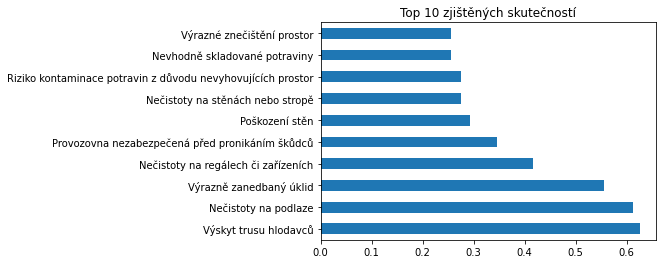

In [10]:
offenses_freq = offenses.mean()
sorted_offenses_freq = offenses_freq.sort_values(ascending=False)
# Plot top 10 offenses (one facility can have many offenses)
sorted_offenses_freq[:10].plot(kind='barh', title='Top 10 zjištěných skutečností');


In [11]:
sorted_offenses_freq_df = offenses_freq.sort_values(ascending=False).reset_index()
sorted_offenses_freq_df.columns = ['zjistena_skutecnost', 'cetnost']


In [12]:
sorted_offenses_freq_df.head(10)

,zjistena_skutecnost,cetnost
0,Výskyt trusu hlodavců,0.625592
1,Nečistoty na podlaze,0.612322
2,Výrazně zanedbaný úklid,0.556398
3,Nečistoty na regálech či zařízeních,0.417062
4,Provozovna nezabezpečená před pronikáním škůdců,0.345024
5,Poškození stěn,0.291943
6,Nečistoty na stěnách nebo stropě,0.275829
7,Riziko kontaminace potravin z důvodu nevyhovuj...,0.274882
8,Nevhodně skladované potraviny,0.255924
9,Výrazné znečištění prostor,0.254976


In [13]:
alt.Chart(sorted_offenses_freq_df.iloc[:10, :]).mark_bar().encode(
    alt.Y('zjistena_skutecnost:N', sort='x', title='Zjištěné skutečnosti'),
    alt.X('cetnost:Q', axis=alt.Axis(format='%'), title='Podíl'),
    )

alt.Chart(...)

In [14]:
print(sorted_offenses_freq_df)

                                  zjistena_skutecnost   cetnost
0                               Výskyt trusu hlodavců  0.625592
1                                Nečistoty na podlaze  0.612322
2                             Výrazně zanedbaný úklid  0.556398
3                 Nečistoty na regálech či zařízeních  0.417062
4     Provozovna nezabezpečená před pronikáním škůdců  0.345024
5                                      Poškození stěn  0.291943
6                    Nečistoty na stěnách nebo stropě  0.275829
7   Riziko kontaminace potravin z důvodu nevyhovuj...  0.274882
8                       Nevhodně skladované potraviny  0.255924
9                          Výrazné znečištění prostor  0.254976
10  Hromadění odpadů, nezajištění odvozu potraviná...  0.211374
11                                   Poškození stropu  0.190521
12     Nezajištěn přístup teplé vody pro očistu rukou  0.174408
13  Prostory provozovny využívány i pro skladování...  0.164929
14                           Výskyt plís

In [15]:
# Establishments closed for good
closed_for_good = combined[combined['stav_uzavreni'] == 'Uzavřeno'].groupby(combined['datum_uzavreni'].dt.year)['referencni_cislo'].count().reset_index()
closed_for_good.columns = ['rok_uzavreni', 'pocet']
closed_for_good

,rok_uzavreni,pocet
0,2015,26
1,2016,20
2,2017,13
3,2018,17
4,2019,13
5,2020,8
6,2021,5
7,2022,2


In [16]:
alt.Chart(closed_for_good).mark_bar().encode(
    alt.Y('rok_uzavreni:N', title='Rok uzavření'),
    alt.X('pocet:Q', title='Počet'),
    )

alt.Chart(...)

In [17]:
def load_offenses_perc(data, as_string=True):
    offenses = data['zjistene_skutecnosti'].str.get_dummies()
    offenses_freq = offenses.mean()
    num = 100 if as_string else 1
    rounding = 1 if as_string else 2
    df = pd.DataFrame((offenses_freq.sort_values(ascending=False) * num).round(rounding))
    df = df.reset_index()
    df.columns = ['Co se zanedbalo', 'Jak často (%)']
    if as_string:
        df['Jak často (%)'] = df['Jak často (%)'].astype(str).str.replace('.', ',', regex=False) + ' %'
    df.index = np.arange(1, len(df) + 1)
    return df


In [18]:
def load_year(data, year):
    return data[
        (data['datum_uzavreni'] >= datetime.datetime(year, 1, 1))
        & (data['datum_uzavreni'] <= datetime.datetime(year, 12, 31))
    ]

In [19]:
def top_problem_across_years(df, start, end):
    l = []
    for year in range(start, end + 1):
        last_year = load_year(df, year)
        problem, percentage = load_offenses_perc(last_year).iloc[0].values
        l.append((year, problem, percentage))
    return pd.DataFrame(l, columns=['Rok', 'Problém', 'Podíl'])

In [20]:
top_problem_across_years(combined, 2015, 2021)

,Rok,Problém,Podíl
0,2015,Výrazně zanedbaný úklid,"59,7 %"
1,2016,Nečistoty na podlaze,"69,5 %"
2,2017,Nečistoty na podlaze,"66,2 %"
3,2018,Výskyt trusu hlodavců,"64,4 %"
4,2019,Výskyt trusu hlodavců,"67,2 %"
5,2020,Výskyt trusu hlodavců,"79,8 %"
6,2021,Výskyt trusu hlodavců,"76,6 %"


In [21]:
def load_offenses(data):
    offenses = data['zjistene_skutecnosti'].str.get_dummies()
    offenses_freq = offenses.mean()
    df = pd.DataFrame((offenses_freq.sort_values(ascending=False)))
    df = df.reset_index()
    df.columns = ['Co se zanedbalo', 'Podíl']
    df.index = np.arange(1, len(df) + 1)
    return df


In [22]:
year = 2021
last_year = load_year(combined, year)
last_year_problems = load_offenses(last_year)


In [23]:

top_problems = last_year_problems.loc[last_year_problems['Co se zanedbalo'].isin(['Výskyt trusu hlodavců', 'Nečistoty na podlaze', 'Výrazně zanedbaný úklid']), :].copy()
# top_problems = top_problems.set_index('Co se zanedbalo')
# top_problems = top_problems.rename({'Jak často (%)': year}, axis=1)

In [24]:
top_problems['Rok'] = 2021
top_problems

,Co se zanedbalo,Podíl,Rok
1,Výskyt trusu hlodavců,0.765957,2021
2,Nečistoty na podlaze,0.521277,2021
3,Výrazně zanedbaný úklid,0.446809,2021


In [25]:
top_multiple_years = pd.DataFrame()
for year in range(2015, 2021):
    last_year = load_year(combined, year)
    last_year_problems = load_offenses(last_year)
    top_problems = last_year_problems.loc[last_year_problems['Co se zanedbalo'].isin(['Výskyt trusu hlodavců', 'Nečistoty na podlaze', 'Výrazně zanedbaný úklid']), :].copy()
    top_problems['Rok'] = year
    top_multiple_years = pd.concat([top_multiple_years, top_problems])
top_multiple_years = top_multiple_years.reset_index(drop=True)
top_multiple_years


,Co se zanedbalo,Podíl,Rok
0,Výrazně zanedbaný úklid,0.597285,2015
1,Nečistoty na podlaze,0.533937,2015
2,Výskyt trusu hlodavců,0.447964,2015
3,Nečistoty na podlaze,0.695402,2016
4,Výrazně zanedbaný úklid,0.632184,2016
5,Výskyt trusu hlodavců,0.580460,2016
6,Nečistoty na podlaze,0.662420,2017
7,Výskyt trusu hlodavců,0.656051,2017
8,Výrazně zanedbaný úklid,0.630573,2017
9,Výskyt trusu hlodavců,0.644068,2018


In [26]:
alt.Chart(top_multiple_years).mark_line().encode(
    alt.X('Rok:N', title='Rok uzavření'),
    alt.Y('Podíl:Q', axis=alt.Axis(format='%'), title='Podíl'),
    color='Co se zanedbalo:N',
    )

alt.Chart(...)